# Imports

In [29]:
import pandas as pd
import numpy as np
import os,  sys
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits import mplot3d

sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

from hetanalysis import HetAnalysis
import plotter
from clean import PCBCCleaner, DrawPointCoordCleaner

output_dir = "../outputs/het_analysis_pcbc/"
SAVE = False

%matplotlib widget

# Data Input and Cleaning

In [30]:
df = PCBCCleaner.get_processed_data()

# Grouping

In [31]:
dhids = list(df['dhid'].unique())

In [32]:
elements = [
    'CU',
    'AU'
]

groups = {}

for dhid in dhids:
    filtered_df = df.query('dhid == @dhid')
    groups[dhid] = {}
    
    for element in elements:
        try:
            groups[dhid][element] = HetAnalysis(f'{dhid}_{element}', filtered_df['weight'], filtered_df['CU'])
        except:
            print(f'Invalid data for {dhid}_{element}')

# Output

Output G-R Graphs

In [33]:
import matplotlib.pyplot as plt

if SAVE:
    fig = plt.figure()
    fig.set_size_inches(8, 8)


    for dhid, group in groups.items():
        save_loc = output_dir + f'{dhid}/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)

        for element in elements:
            fig.clear()
            ax = fig.add_subplot()

            het = group[element].get_heterogeneity()
            info = group[element].get_info()
            
            if len(info) > 0:
                ax.set_title(f'{dhid}_{element}_HET={het:.2f}')
                plotter.plot_grade_recovery_curve(ax, info, element)

                fig.savefig(save_loc + f'{dhid}_{element}.svg', format='svg')

In [34]:
# then we want to graph the mass yield curves for all the individual elements
no_of_graphs = len(elements)

if SAVE:
    fig = plt.figure()
    fig.set_size_inches(12, 12)

    s = 0.5
    alpha = 0.4

    for element in elements:
        fig.clear()
        ax = fig.add_subplot()
        ax_sec = ax.twinx()
        
        for dhid, group in groups.items():
            if element in group:
                plotter.scatter_g_r(ax, ax_sec, group[element].get_info(), s=s, alpha=alpha)
                
        plotter.set_g_r_labels(ax, ax_sec, element)
        ax.set_title(f'master_{element}')

        save_loc = output_dir + f'master/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)
        fig.savefig(save_loc + f'master_{element}.png', format='png', dpi=200)

In [35]:
combined_data = {}
for element in elements:
    combined_data[element] = HetAnalysis(f"combined_{element}", df['weight'], df[element])

In [36]:
if SAVE:
    fig = plt.figure()
    fig.set_size_inches(8, 8)

    for element in elements:
        fig.clear()
        ax = fig.add_subplot()

        het = combined_data[element].get_heterogeneity()
        info = combined_data[element].get_info()
            
        if len(info) > 0:
            ax.set_title(f'combined_{element}_HET={het:.2f}')
            plotter.plot_grade_recovery_curve(ax, info, element)

            save_loc = output_dir + f'combined/'
            if not os.path.exists(save_loc):
                os.makedirs(save_loc)
            fig.savefig(save_loc + f'combined_{element}.png', format='png', dpi=200)

# Visualize

In [9]:
dp_coords = DrawPointCoordCleaner.get_processed_data()

dp_coords = dp_coords.rename(
    columns={
        "Draw Point Name": "name", 
        "X-dpt": "x",
        'Y-dpt': 'y',
        'Z-dpt': 'z'
    }
)
dp_coords = dp_coords.set_index('name')

In [10]:
for dhid, group in groups.items():
    if dhid not in list(dp_coords.index):
        print('dhid')

In [39]:
dp_coords.loc['P04-11W'].to_dict()

{'x': 737794.5625, 'y': 9548840.0, 'z': 2598.529052734375}

In [40]:
hs = {}
for element in elements:
    hs[element] = {
        'nan': set(),
        'het': set()
    }
    for dpid in list(dp_coords.index):
        if dpid not in groups:
            hs[element]['nan'].add(dpid)
        else:
            if element in groups[dpid]:
                hs[element]['het'].add(dpid)
            else:
                hs[element]['nan'].add(dpid)

In [55]:
hs['CU']['het']

{'P08-04W',
 'P08-05W',
 'P08-06W',
 'P08-07W',
 'P08-08W',
 'P08-09W',
 'P08-10W',
 'P09-03W',
 'P09-04E',
 'P09-04W',
 'P09-05E',
 'P09-05W',
 'P09-06E',
 'P09-06W',
 'P09-07E',
 'P09-07W',
 'P09-08E',
 'P09-08W',
 'P09-09E',
 'P09-09W',
 'P09-10E',
 'P09-10W',
 'P10-03E',
 'P10-03W',
 'P10-04E',
 'P10-04W',
 'P10-05E',
 'P10-05W',
 'P10-06E',
 'P10-06W',
 'P10-07E',
 'P10-07W',
 'P10-08E',
 'P10-08W',
 'P10-09E',
 'P10-09W',
 'P10-10E',
 'P10-10W',
 'P11-03E',
 'P11-03W',
 'P11-04E',
 'P11-04W',
 'P11-05E',
 'P11-05W',
 'P11-06E',
 'P11-06W',
 'P11-07E',
 'P11-07W',
 'P11-08E',
 'P11-08W',
 'P11-09E',
 'P11-09W',
 'P11-10E',
 'P11-10W',
 'P11-11W',
 'P11-12W',
 'P11-13W',
 'P12-03E',
 'P12-03W',
 'P12-04E',
 'P12-04W',
 'P12-05E',
 'P12-05W',
 'P12-06E',
 'P12-06W',
 'P12-07E',
 'P12-07W',
 'P12-08E',
 'P12-08W',
 'P12-09E',
 'P12-09W',
 'P12-10E',
 'P12-10W',
 'P12-11E',
 'P12-11W',
 'P12-12E',
 'P12-12W',
 'P12-13E',
 'P12-13W',
 'P13-03E',
 'P13-03W',
 'P13-04E',
 'P13-04W',
 'P1

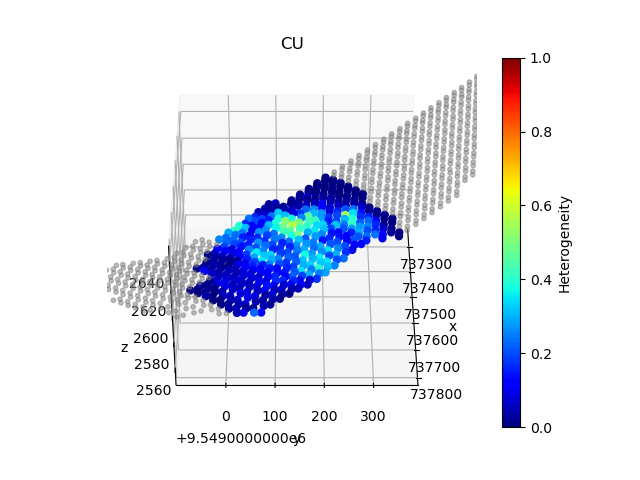

In [58]:
fig = plt.figure()
ax = plt.axes(projection='3d')

element = 'CU'

nan_dps = hs[element]['nan']
het_dps = hs[element]['het']

cmap = plt.colormaps.get('jet')

p = ax.scatter3D(
    [dp_coords.loc[dpid]['x'] for dpid in het_dps], 
    [dp_coords.loc[dpid]['y'] for dpid in het_dps],
    [dp_coords.loc[dpid]['z'] for dpid in het_dps], 
    c=[groups[dpid][element].get_heterogeneity() for dpid in het_dps],
    vmax=1,
    cmap=cmap,
    s=25,
    alpha=1
)

# Set limits to the non-nan values
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())
ax.set_zlim([2550, 2650])

ax.scatter3D(
    [dp_coords.loc[dpid]['x'] for dpid in nan_dps], 
    [dp_coords.loc[dpid]['y'] for dpid in nan_dps],
    [dp_coords.loc[dpid]['z'] for dpid in nan_dps], 
    s=10,
    alpha=0.5,
    c='grey'
)

ax.set_title(element)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.azim = 0
ax.elev = 40

cbar = fig.colorbar(p)
cbar.set_label('Heterogeneity')

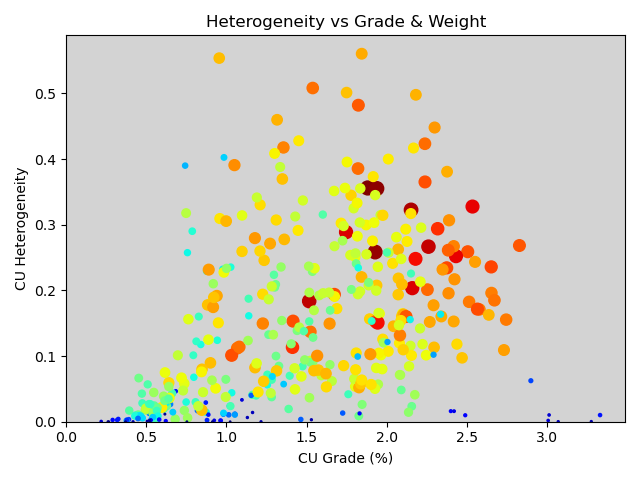

In [59]:
element = 'CU'

x, y, w = [], [], []

for dhid, group in groups.items():
    x.append(group[element].get_grade())
    y.append(group[element].get_heterogeneity())
    w.append(group[element].get_cml_weight())
    
max_w = np.max(w)
scaled_w = 1 + (9 * (w / max_w))


fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x, y, s=scaled_w**2, c=w, cmap=plt.colormaps.get('jet'))

ax.set_xlabel(f'{element} Grade (%)')
ax.set_xlim(0, None)

ax.set_ylabel(f'{element} Heterogeneity')
ax.set_ylim(0, None)

ax.set_title('Heterogeneity vs Grade & Weight')
ax.set_facecolor('lightgrey')

fig.tight_layout()

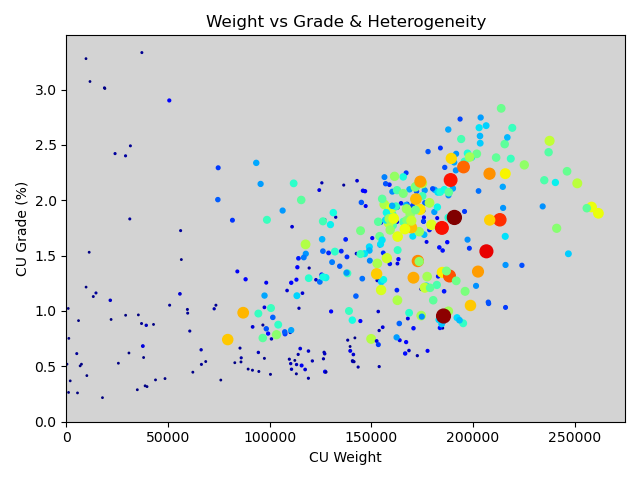

In [60]:
element = 'CU'

x, y, h = [], [], []

for dhid, group in groups.items():
    y.append(group[element].get_grade())
    x.append(group[element].get_cml_weight())
    h.append(group[element].get_heterogeneity())
    
max_h = np.max(h)
scaled_h = 1 + (9 * (h / max_h))

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x, y, s=scaled_h**2, c=h, cmap=plt.colormaps.get('jet'))

ax.set_xlabel(f'{element} Weight')
ax.set_xlim(0, None)

ax.set_ylabel(f'{element} Grade (%)')
ax.set_ylim(0, None)

ax.set_title('Weight vs Grade & Heterogeneity')
ax.set_facecolor('lightgrey')

fig.tight_layout()

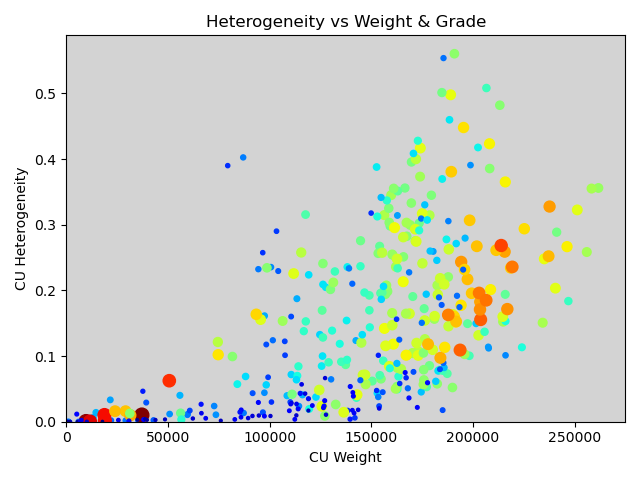

In [61]:
element = 'CU'

x, y, g = [], [], []

for dhid, group in groups.items():
    x.append(group[element].get_cml_weight())
    y.append(group[element].get_heterogeneity())
    g.append(group[element].get_grade())
    
max_g = np.max(g)
scaled_g = 1 + (9 * (g / max_g))

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x, y, s=scaled_g**2, c=g, cmap=plt.colormaps.get('jet'))

ax.set_xlabel(f'{element} Weight')
ax.set_xlim(0, None)

ax.set_ylabel(f'{element} Heterogeneity')
ax.set_ylim(0, None)

ax.set_title('Heterogeneity vs Weight & Grade')
ax.set_facecolor('lightgrey')

fig.tight_layout()